<a href="https://colab.research.google.com/github/Soojeoong/ML_study/blob/main/MLtext_2%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인공 뉴런 : 초기 머신 러닝의 간단한 역사

- 맥컬록-피츠(MCP) 뉴런
- 로젠블라트의 임계 퍼셉트론 모델

## 퍼셉트론 학습 규칙

- 환원주의reductionism 접근 방식 사용
    - 출력을 내거나 내지 않는 두 가지 경우만 있음
1. **가중치**를 0 또는 랜덤한 작은 값으로 **초기화**함
2. **각 훈련 샘플 x(i)**에서 다음 작업을 함
    1. 출력 값 **y_hat**을 계산
    2. **가중치 업데이트**
- 출력 값 : 가중치 벡터 w에 있는 개별 가중치 wj가 동시에 업데이트되는 것을 다음과 같이 씀

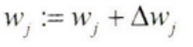

- 가중치 wj에 대한 업데이트 값 (wj의 변화량)인 delta_wj 값은 퍼셉트론 학습 규칙에 따라 계산됨
    - n : 학습률learning rate (0.0~1.0 사이 실수)
    - y(i) : i번째 훈련 샘플의 진짜 클래스 레이블
    - y_hat(i) : 예측 클래스 레이블
    - → 가중치 벡터의 모든 가중치를 동시에 업데이트하는 것 !
    - 즉, 모든 가중치가 각자의 업데이트 값 delta_wj에 의해 업데이트되기 전에 예측 레이블 y_hat(i)를 다시 계산하지 않음

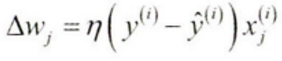

- 2차원 데이터셋에서 업데이트되는 과정

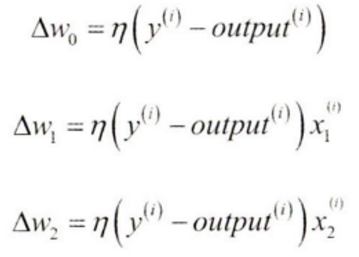

- 퍼셉트론이 클래스 레이블을 정확히 예측한 두 경우는 가중치가 변경되지 않고 그대로 유지됨 ⇒ 업데이트 값 : 0
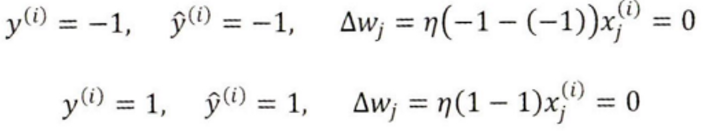

- 잘못 예측했을 때는 가중치를 양성 또는 음성 타깃 클래스 방향으로 이동시킴
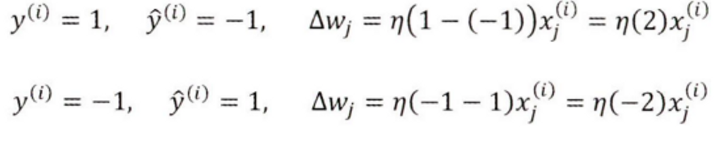

- 퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작을 때만 수렴이 보장됨
    - 두 클래스를 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(에포크epoch)를 지정하고 분류 허용 오차를 지정할 수 있음
    - 그렇지 않으면 퍼셉트론은 가중치 업데이트를 멈추지 않음
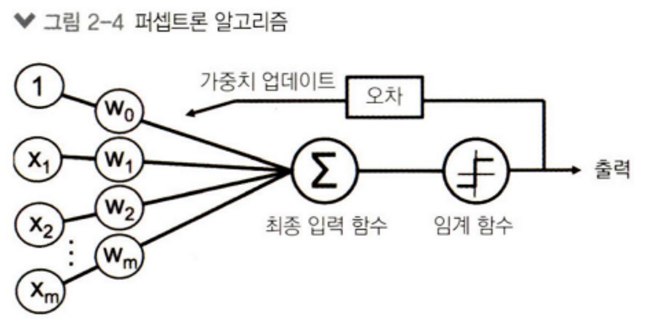

- 퍼셉트론이 샘플 x를 입력으로 받아 가중치 w를 연결하여 최종 입력을 계산하는 방법을 보여줌
- 그다음 최종 입력은 임계 함수로 전달되어 샘플의 예측 클래스 레이블인 -1 또는 +1의 이진 출력을 만듦
- 학습 단계에서 이 출력을 사용하여 예측 오차를 계산하고 가중치 업데이트함

# 파이썬으로 퍼셉트론 학습 알고리즘 구현

## 객체 지향 퍼셉트론 API
- Perceptron 객체를 초기화한 후 fit 메서드로 데이터에서 학습하고, 별도의 predict 메서드로 예측을 만듦
- 관례에 따라 객체의 초기화 과정에서 생성하지 않고 다른 메서드를 호출하여 만든 속성은 밑줄\_을 추가함 ex) self.w_

In [9]:
 # 퍼셉트론 구현
 import numpy as np

 class Perceptron(object):
  """ 퍼셉트론 분류기

  매개변수
  ____________
  eta : float 학습률 (0.0 ~ 1.0)
  n_iter : int 훈련 데이터셋 반복 횟수
  random_state : int 가중치 무작위 초기화를 위한 난수 생성기 시드

  속성
  _____________
  w_ : 1d-array 학습된 가중치
  errors_ : list 에포크마다 누적된 분류 오류

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습
    X : {array-like}, shape=[n_samples, n_features]
        n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape=[n_samples]
        타깃 값

    return값 = self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                          size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    # 입력 계산
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    # 단위 계단 함수를 사용하여 클래스 레이블을 반환함
    return np.where(self.net_input(X) >= 0.0, 1, -1)

## 붓꽃 데이터셋에서 퍼셉트론 훈련

Note) 다중 클래스 분류를 위한 일대다 전략
= OvR(One-versus-Rest), OvA(One-versus-All)
- 이진 분류기를 다중 클래스 문제에 적용할 수 있음
- OvA를 사용할 때 클래스마다 하나의 분류기를 훈련함
- 각 클래스는 양성 클래스로 취급되고 다른 클래스의 샘플은 모두 음성 클래스로 생각함
- 레이블이 없는 새로운 데이터 샘플을 분류할 때는 클래스 레이블의 개수와 같은 n개의 분류기를 사용함
- 신뢰도가 가장 높은 클래스 레이블을 분류하려는 샘플에 할당함
- 퍼셉트론은 OvA를 사용하여 최종 입력의 절댓값이 가장 큰 클래스를 레이블로 선택함

In [10]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris', 'iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [11]:
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


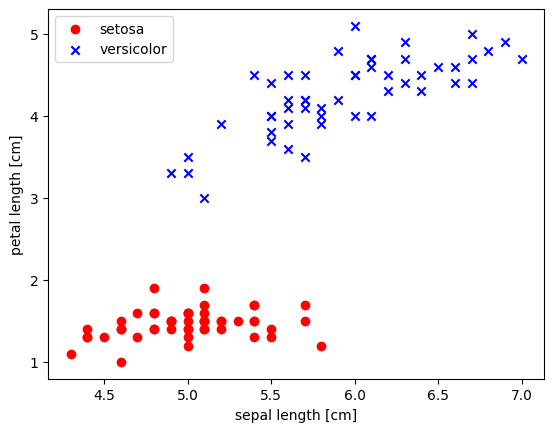

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이 추출
X = df.iloc[0:100, [0,2]].values

# 산점도를 그림
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

에포크 대비 잘못 분류된 오차를 그래프로 그려서, 알고리즘이 수렴하여 두 붓꽃 클래스를 구분하는 결정 경계 찾는지 확인하기

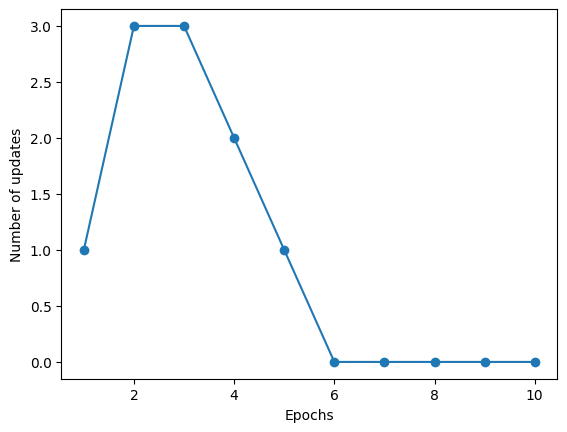

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [17]:
# 2차원 데이터셋의 결정 경계 시각화
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution=0.02):

  # 마커와 컬러맵 설정
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계 그림
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

<ipython-input-17-dcc31aae8060>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


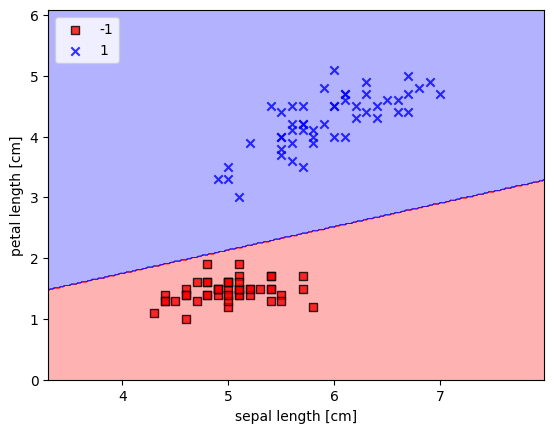

In [18]:
# 결정 그래프 그리기
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### 아달린 알고리즘
- 선형 활성화 함수 (항등 함수)

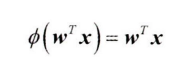

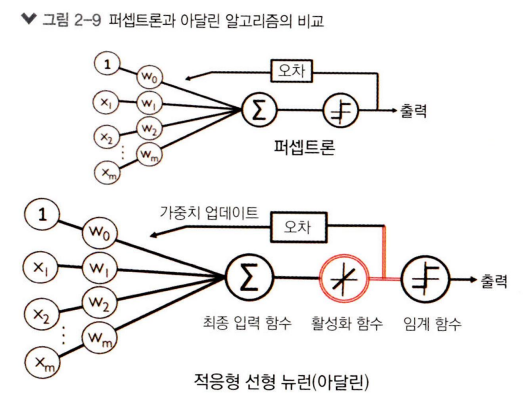

## 경사 하강법으로 비용 함수 최소화
- 최소화하려는 비용 함수가 목적 함수가 됨
- 아달린은 계산된 출력과 진짜 클래스 레이블 사이의 제곱 오차합(SSE)으로 가중치를 학습하기 위한 비용 함수 J를 정의함

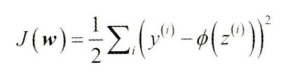

- 계단 함수 대신 연속적인 선형 활성화 함수를 사용하는 장점은 비용 함수가 미분 가능해짐, 볼록 함수임

### 경사 하강법 알고리즘

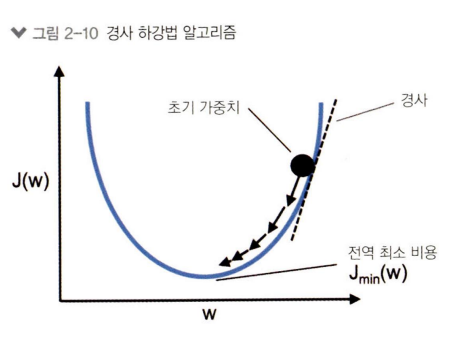
- 경사 하강법을 사용하면 비용 함수 J(w)의 그레이디언트 delta_J(w) 반대 방향으로 조금씩 가중치를 업데이트할 수 있음

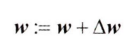

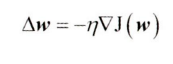
- 비용 함수의 그레이디언트 계산 : 각 가중치 wj에 대한 편도 함수 계산

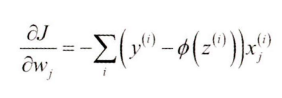

=> 가중치 wj의 업데이트 공식

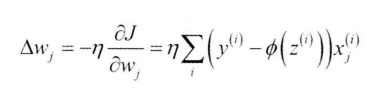

- 훈련 데이터셋에 있는 모든 샘플을 기반으로 가중치 업데이트를 계산함(각 샘플마다 가중치 업데이트하지 않음) : 배치 경사 하강법

### 파이썬으로 아달린 구현
fit 메서드를 바꾸어 경사 하강법으로 비용 함수가 최소화되도록 가중치 업데이트함

In [1]:
class AdalineGD(object):
  """ 적응형 선형 뉴런 분류기

  매개변수
  ____________
  eta : float 학습률 (0.0 ~ 1.0)
  n_iter : int 훈련 데이터셋 반복 횟수
  random_state : int 가중치 무작위 초기화를 위한 난수 생성기 시드

  속성
  _____________
  w_ : 1d-array 학습된 가중치
  cost_ : list 에포크마다 누적된 비용 함수의 제곱합

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습
    X : {array-like}, shape=[n_samples, n_features]
        n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape=[n_samples]
        타깃 값

    return값 = self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                          size=1 + X.shape[1])
    self.cost_ = []

    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_append(cost)
    return self

  def net_input(self, X):
    # 최종 입력 계싼
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    # 선형 활성화 계산
    return X

  def predict(self, X):
    # 단위 계단 함수를 사용하여 클래스 레이블을 반환함
    return np.where(self.net_input(X) >= 0.0, 1, -1)